#Major Project

In [52]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('heart.csv')

In [54]:
df.head() #To display our data in tabular form

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

#EDA

In [55]:
np.shape(df) #Shows the total number of rows and columns in our dataset

(303, 14)

In [56]:
df.columns #Shows the column names in our dataset

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [57]:
df.nunique(axis=0) #No of unique values in different columns

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [58]:
df.isnull().sum() #To check for number of null values in the columns

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [59]:
df.info() #Displays data types and count of non-null values in the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [60]:
df.describe() #summarizes the mean, count, standard deviation, minimum and maximum for the numeric variables

age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]

In [61]:
df['target'].value_counts() #Displays the number of 1's and 0's in the 'target' column

1    165
0    138
Name: target, dtype: int64

In [62]:
#To create a correlation matrix that helps us see the correlations between different variables

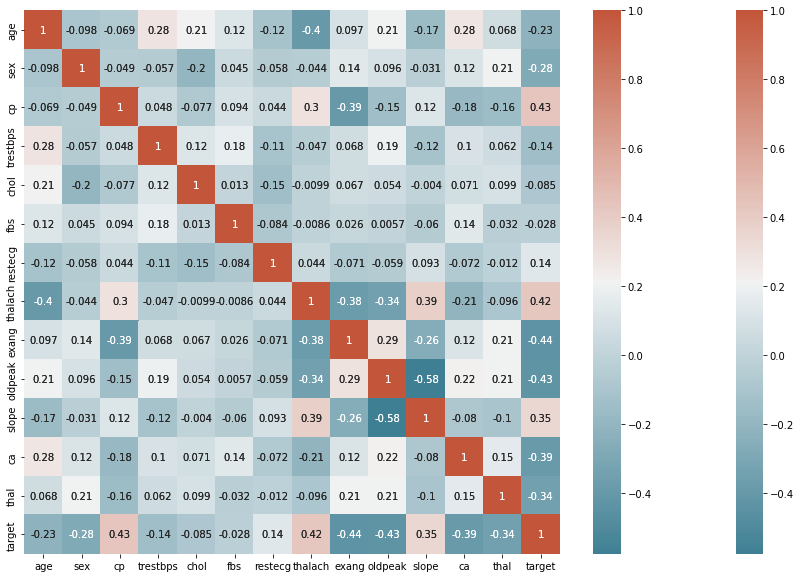

In [63]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

# Vizualisation

In [64]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

sex=[1 = male, 0 = female]
chest pain type =[0=Typical angina, 1=Atypical angina, 2=Non-anginal pain, 3=Asymptomatic]
Fasting Blood Sugar=[1 = true, 0 = false]
Resting Electrocardiographic=[0 = Normal, 1 = Non-Normal, 2 = Risk]
Exercise induced Angina =[1 = yes; 0 = no]
Peak Exercise=[0= better heart rate with excercise 1=typical healthy heart, 2=signs of unhealthy heart]
=[0=,1=,2=,3=,4=]
=[0=,1=,2=,3=]
=[0=,1=]


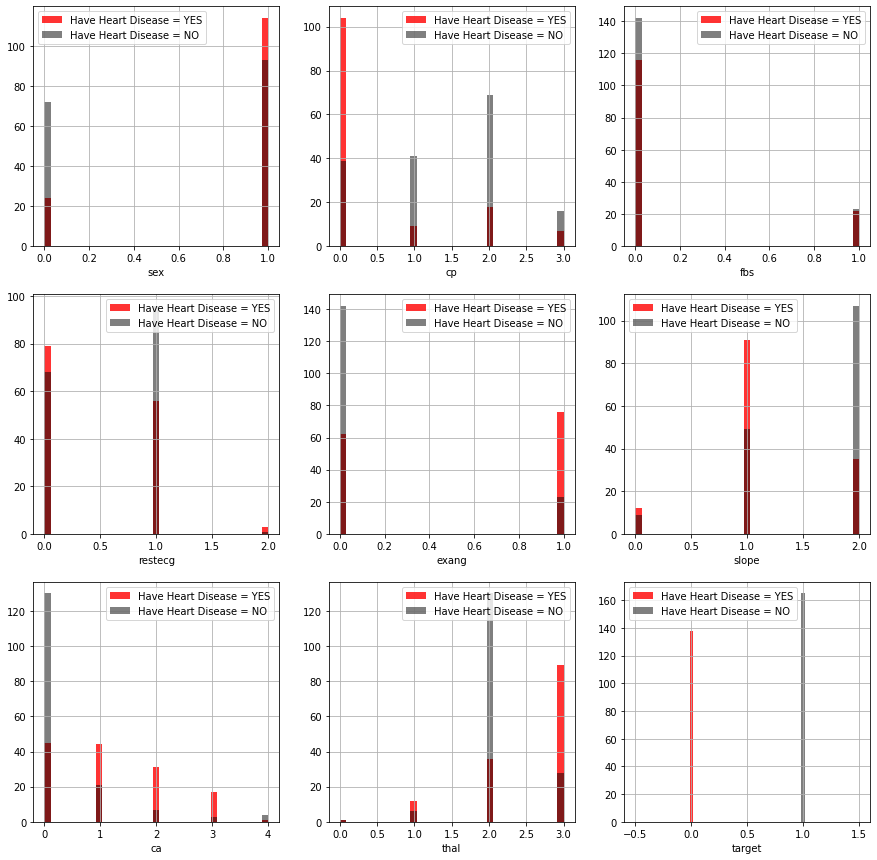

In [65]:
plt.figure(figsize=(15, 15))
print ("sex=[1 = male, 0 = female]")
print ("chest pain type =[0=Typical angina, 1=Atypical angina, 2=Non-anginal pain, 3=Asymptomatic]")
print ("Fasting Blood Sugar=[1 = true, 0 = false]")
print ("Resting Electrocardiographic=[0 = Normal, 1 = Non-Normal, 2 = Risk]")
print ("Exercise induced Angina =[1 = yes; 0 = no]")
print ("Peak Exercise=[0= better heart rate with excercise 1=typical healthy heart, 2=signs of unhealthy heart]")
print ("=[0=,1=,2=,3=,4=]")
print ("=[0=,1=,2=,3=]")
print ("=[0=,1=]")
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='Red', label='Have Heart Disease = YES', alpha=.8)
    df[df["target"] == 1][column].hist(bins=35, color='Black', label='Have Heart Disease = NO', alpha=.5)
    plt.legend()
    plt.xlabel(column)

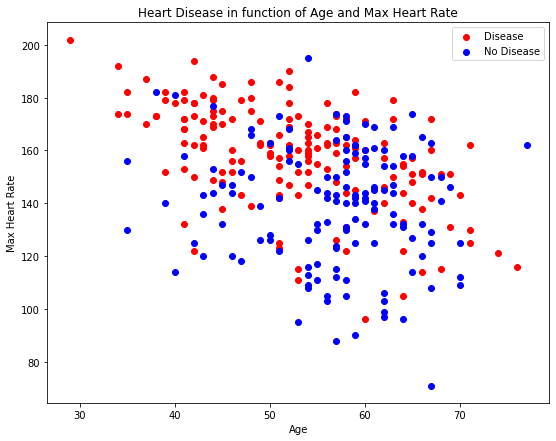

In [66]:
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="blue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

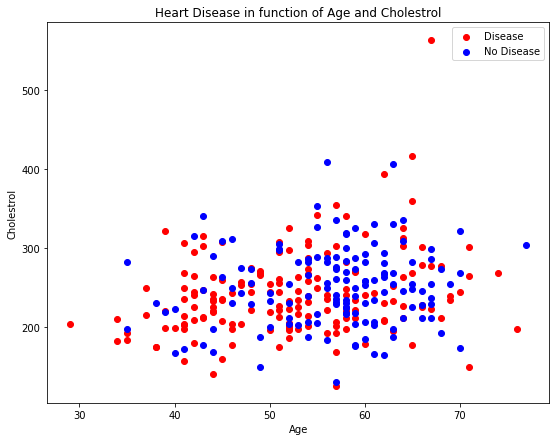

In [67]:
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.chol[df.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.chol[df.target==0],
            c="blue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Cholestrol")
plt.xlabel("Age")
plt.ylabel("Cholestrol")
plt.legend(["Disease", "No Disease"]);

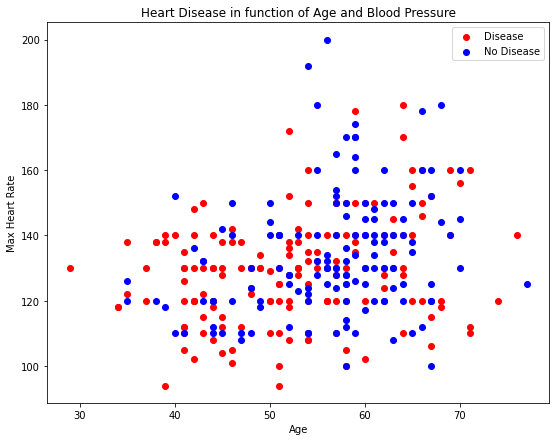

In [68]:
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.trestbps[df.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.trestbps[df.target==0],
            c="blue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

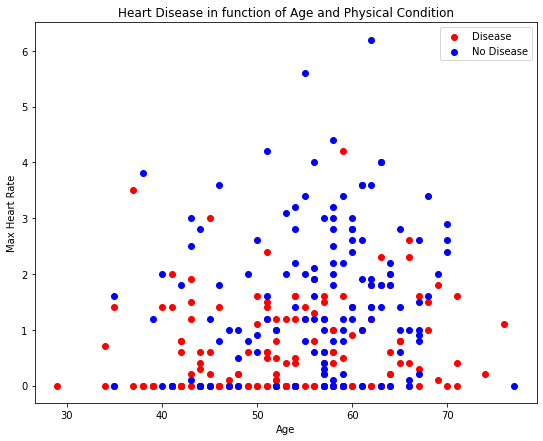

In [69]:
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.oldpeak[df.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.oldpeak[df.target==0],
            c="blue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Physical Condition")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

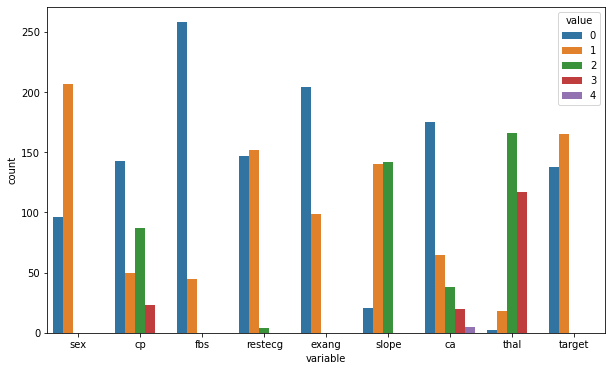

In [70]:
plt.figure(figsize=(10,6))
dataframe_categorical = df.loc[:,['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]
sns.countplot(x="variable", hue="value",data= pd.melt(dataframe_categorical));

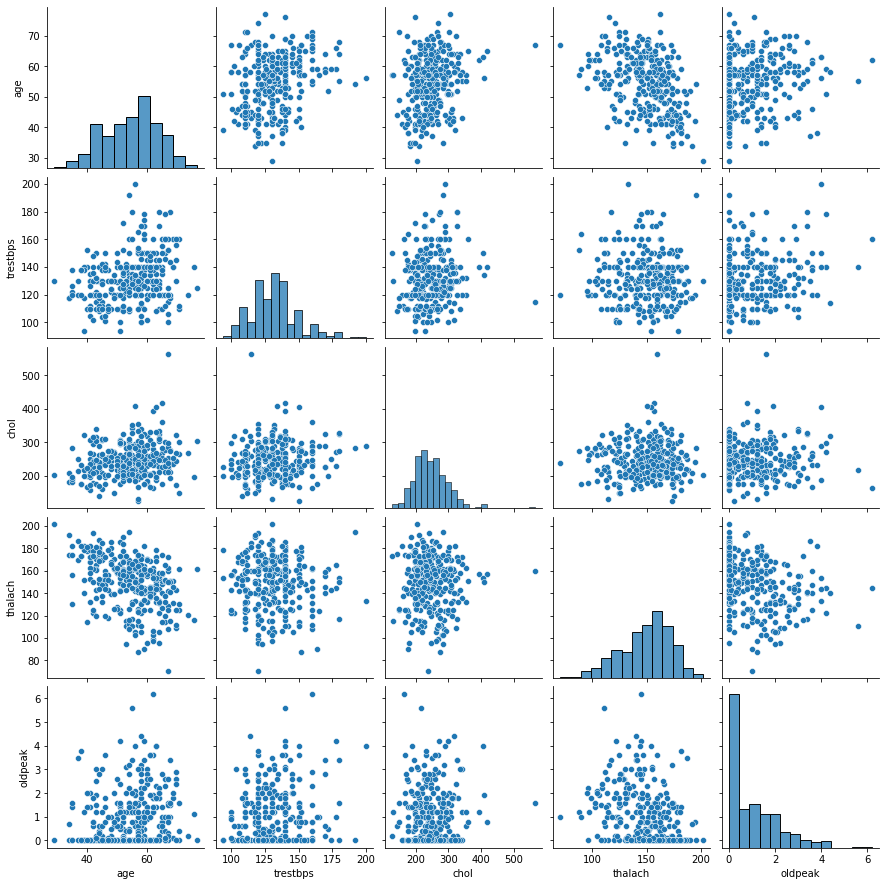

In [71]:
subData = df[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData)

In [72]:
##### DATA FILTERING

In [73]:
# To filter the data according to positive heart disease patients

In [74]:
pos_df = df[df['target']==1]

pos_df.describe()

age         sex          cp  ...          ca        thal  target
count  165.000000  165.000000  165.000000  ...  165.000000  165.000000   165.0
mean    52.496970    0.563636    1.375758  ...    0.363636    2.121212     1.0
std      9.550651    0.497444    0.952222  ...    0.848894    0.465752     0.0
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000     1.0
25%     44.000000    0.000000    1.000000  ...    0.000000    2.000000     1.0
50%     52.000000    1.000000    2.000000  ...    0.000000    2.000000     1.0
75%     59.000000    1.000000    2.000000  ...    0.000000    2.000000     1.0
max     76.000000    1.000000    3.000000  ...    4.000000    3.000000     1.0

[8 rows x 14 columns]

In [75]:
# To filter the data according to negative heart disease patients

In [76]:
neg_df = df[df['target']==0]

neg_df.describe()

age         sex          cp  ...          ca        thal  target
count  138.000000  138.000000  138.000000  ...  138.000000  138.000000   138.0
mean    56.601449    0.826087    0.478261  ...    1.166667    2.543478     0.0
std      7.962082    0.380416    0.905920  ...    1.043460    0.684762     0.0
min     35.000000    0.000000    0.000000  ...    0.000000    0.000000     0.0
25%     52.000000    1.000000    0.000000  ...    0.000000    2.000000     0.0
50%     58.000000    1.000000    0.000000  ...    1.000000    3.000000     0.0
75%     62.000000    1.000000    0.000000  ...    2.000000    3.000000     0.0
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000     0.0

[8 rows x 14 columns]

In [77]:
####### USING MACHINE LEARNING ALGORITHMS

In [78]:
#preparing the data for training and assigning values to variables X and Y

In [79]:
X = df.iloc[:, :-1].values

Y = df.iloc[:, -1].values

In [80]:
#To split the data into training and testing sets

In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 1)

In [82]:
# Now, to normalize the data so its distribution will have a mean of 0

In [83]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

#Logistic Regression

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [86]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1]


In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[20 10]
 [ 6 25]]


In [88]:
(20+25)/(10+6+20+25)

0.7377049180327869

In [89]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.85 %
Standard Deviation: 6.06 %


# Random Forest Model

In [90]:
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

In [91]:
random_model = RandomForestClassifier(random_state=1)# get instance of model

random_model.fit(x_train, y_train) # Train model

y_pred = random_model.predict(x_test) # get y predictions

print(classification_report(y_test, y_pred)) # output accuracy

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [92]:
#The random forest model has 80% accuracy

In [93]:
# get importance

importance = random_model.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):

   print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07814
Feature: 1, Score: 0.04206
Feature: 2, Score: 0.16580
Feature: 3, Score: 0.07477
Feature: 4, Score: 0.07587
Feature: 5, Score: 0.00828
Feature: 6, Score: 0.02014
Feature: 7, Score: 0.12772
Feature: 8, Score: 0.06950
Feature: 9, Score: 0.09957
Feature: 10, Score: 0.04677
Feature: 11, Score: 0.11667
Feature: 12, Score: 0.07473


In [94]:
# From the above output we conclude that the top three features are chest pain type (cp), 
# maximum heart rate achieved (thalach) and the number of major vessels (ca).

# Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier


In [96]:
max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(x_train,y_train)
    y_pred_dt = dt.predict(x_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [97]:
print(y_pred_dt.shape)

(61,)


In [98]:
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 77.05 %


# K-Nearest Neighbours


In [99]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

In [100]:
y_pred_knn.shape

(61,)

In [101]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 80.33 %
